<h2> Dữ liệu được lấy từ OSMI(Open Sourcing Mental Illness) năm 2014, 2016, 2017, 2018, 2019, 2020, 2021</h2>

In [5]:
# import thư viện drive để đọc file từ google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
import pandas as pd  # data processing, CSV file I/O
# đọc file và cột năm và ghép các file thành 1
survey2014 = pd.read_csv('/content/drive/MyDrive/MentalHealth/datasets/OSMIsurvey2014.csv').assign(Year=2014)
survey2016 = pd.read_csv('/content/drive/MyDrive/MentalHealth/datasets/OSMIsurvey2016.csv').assign(Year=2016)
survey2017 = pd.read_csv('/content/drive/MyDrive/MentalHealth/datasets/OSMIsurvey2017.csv').assign(Year=2017)
survey2018 = pd.read_csv('/content/drive/MyDrive/MentalHealth/datasets/OSMIsurvey2018.csv').assign(Year=2018)
survey2019 = pd.read_csv('/content/drive/MyDrive/MentalHealth/datasets/OSMIsurvey2019.csv').assign(Year=2019)

survey141619 =  pd.concat([survey2014, survey2016, survey2019], ignore_index=True, sort=True)
survey1718 = pd.concat([survey2017, survey2018], ignore_index=True, sort=True)

survey = pd.concat([survey141619, survey1718,survey2021], ignore_index=True, sort=True)
print(survey.shape)

(4529, 212)


In [8]:
survey


,#,*Are you self-employed?*,*Do you have previous employers?*,"*If possibly, what disorder(s) do you believe you have?*","*If so, what disorder(s) were you diagnosed with?*",*What disorder(s) have you been diagnosed with?*,<strong>Are you self-employed?</strong>,<strong>Do you have previous employers?</strong>,<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>,<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>,...,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Would you feel comfortable discussing a mental health issue with your coworkers?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss your mental health with your coworkers at previous employers?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,naobzal5q63ahg9qanaobnk0rcn7wl6z,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Yes,Physical health,NaN,NaN,At some of my previous employers,Some of my previous supervisors,Physical health,2021
4525,biuiv5zu5uhm4ebm5dk959ttbiuiv5wo,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Maybe,Maybe,Physical health,NaN,NaN,"No, at none of my previous employers","No, none of my previous supervisors",Physical health,2021
4526,ctnfitiaq7rv20teurctnfitinl0xbdt,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
4527,a7eq07l1ositg5i3p38yta7eq07lhoed,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


Sau khi có được bảng tổng, làm sạch dữ liệu:
- Đặt lại tên cột 
- Bỏ các cột không cần thiết
- Đánh lại só thứ tự

In [9]:
import re 

def cleanColumns(dataframe):
    dataframe.columns = map(str.lower, dataframe.columns)

    # Remove HTML artifacts
    dataframe.rename(columns=lambda colname: re.sub('</\w+>', '', colname), inplace=True)
    dataframe.rename(columns=lambda colname: re.sub('<\w+>', '', colname), inplace=True)
    dataframe.rename(columns = {'how many employees does your company or organization have?':'Company Size', 
                                'do you have a family history of mental illness?' : 'Family History of Mental Illness'}, inplace = True) 
 
    dataframe.drop(columns=['#', 'start date (utc)', 'submit date (utc)', 'network id', 'timestamp'], inplace=True)
    dataframe.reset_index(drop=True)

    return dataframe

survey = cleanColumns(survey)
print(survey.shape)

(4529, 207)


Kiểm tra dữ liệu null/bẩn


                                                    Total missing     Percent
psychotic disorder (schizophrenia, schizoaffect...           4529  100.000000
dissociative disorder                                        4529  100.000000
stress response syndromes                                    4529  100.000000
anxiety disorder (generalized, social, phobia, ...           4529  100.000000
describe the circumstances of the supportive or...           4529  100.000000
attention deficit hyperactivity disorder                     4529  100.000000
addictive disorder                                           4529  100.000000
substance use disorder                                       4529  100.000000
other                                                        4529  100.000000
post-traumatic stress disorder                               4529  100.000000
personality disorder (borderline, antisocial, p...           4529  100.000000
obsessive-compulsive disorder                                452

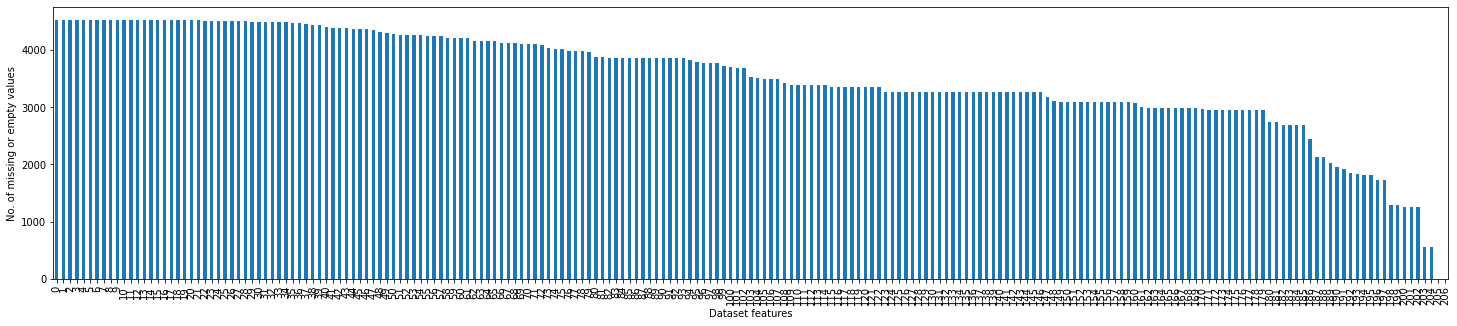

In [10]:
import numpy as np; 
import matplotlib.pyplot as plt
%matplotlib inline

def ShowNullValues(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    nullValues = dataframe.isnull().sum()
    totalValues = dataframe.isnull().count()
    percent = (nullValues/totalValues).sort_values(ascending=False)
    missingData = pd.concat([total, percent*100], axis=1, keys=['Total missing', 'Percent'])
    print(missingData.head(20))
    plt.figure(figsize=(25,5))
    total.plot.bar()
    y = ((lambda x: str(x)) (x) for x in range(len(dataframe.columns)))
    plt.xticks(np.arange(len(dataframe.columns)), (y))
    plt.ylabel("No. of missing or empty values")
    plt.xlabel("Dataset features")
    plt.show()
    return missingData

noisyData = ShowNullValues(survey)

<h2> Làm sạch dữ liệu </h2>

In [11]:
# Làm sạch dữ liệu tuổi, giữ lại những dữ liệu phù hợp và chia theo độ tuổi
ageDistribution = survey.loc[:, ['age', 'what is your age?']]
ageDistribution.fillna(0, inplace=True)
survey.loc[:,'Age'] = ageDistribution.sum(axis=1)
survey.loc[survey['Age']>100, 'Age'] = 0
survey.loc[survey['Age']<10, 'Age'] = 0
survey['Age-Group'] = pd.cut(survey['Age'], [0, 20, 30, 40, 65, 100], labels=["0-20", "21-30", "31-40", "41-65", "66-100"], include_lowest=True)
survey.drop(ageDistribution, axis=1, inplace=True)
showAge = survey['Age']
print(showAge.unique())

[37. 44. 32. 31. 33. 35. 39. 42. 23. 29. 36. 27. 46. 41. 34. 30. 40. 38.
 50. 24. 18. 28. 26. 22. 19. 25. 45. 21.  0. 43. 56. 60. 54. 55. 48. 20.
 57. 58. 47. 62. 51. 65. 49. 53. 61. 11. 72. 52. 17. 63. 99. 66. 59. 15.
 74. 70. 64. 67.]


In [12]:
# Dữ liệu theo giới tính
genderDistribution = survey.loc[:, survey.columns.str.contains('gender|Gender', regex=True)]
survey['Gender'] = genderDistribution.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Gender'].str.contains('Trans|them|trans|Undecided|Contextual|transgender|nb|unicorn|Unicorn|queer|NB|binary|Enby|Human|little|androgynous|Androgyne|Neutral|Agender|Androgynous|Androgynous|Fluid|GenderFluid|Genderflux|genderqueer|Genderqueer' , regex=True), 'Gender'] = 'Undecided'
survey.loc[survey['Gender'].str.contains('Female|female|FEMALE|Woman|woman|w|womail|W|Cis female| Female (cis)|Cis Female|cis female|cis woman|F|f' , regex=True), 'Gender'] = 'Female'
cond1 = survey['Gender']!='Female'
cond2 = survey['Gender']!='Undecided'
survey.loc[cond1 & cond2, 'Gender'] = 'Male'
survey.drop(genderDistribution, axis=1, inplace=True)
showGender = survey['Gender']
print(showGender.unique())

['Female' 'Male' 'Undecided']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


<h2>Số người trả lời đã tìm cách điều trị các tình trạng sức khỏe tâm thần.</h2>

In [13]:
soughtTreatment = survey.loc[:, survey.columns.str.contains('sought treatment')]
soughtTreatment.fillna('', inplace=True)
survey['Sought Treatment'] = soughtTreatment.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Sought Treatment'].str.contains('yes|1.0|1|Yes|True|true' , regex=True, na=False), 'Sought Treatment'] = 1
survey.loc[survey['Sought Treatment'].str.contains('no|0.0|0|No|False|false' , regex=True, na=False), 'Sought Treatment'] = 0
survey.drop(soughtTreatment, axis=1, inplace=True)
showSoughtTreatment = survey['Sought Treatment']
print(showSoughtTreatment.unique())

[1 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


                                                    Total missing     Percent
addictive disorder                                           4529  100.000000
substance use disorder                                       4529  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4529  100.000000
post-traumatic stress disorder                               4529  100.000000
attention deficit hyperactivity disorder                     4529  100.000000
stress response syndromes                                    4529  100.000000
personality disorder (borderline, antisocial, p...           4529  100.000000
dissociative disorder                                        4529  100.000000
anxiety disorder (generalized, social, phobia, ...           4529  100.000000
describe the circumstances of the supportive or...           4529  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4529  100.000000
obsessive-compulsive disorder                                452

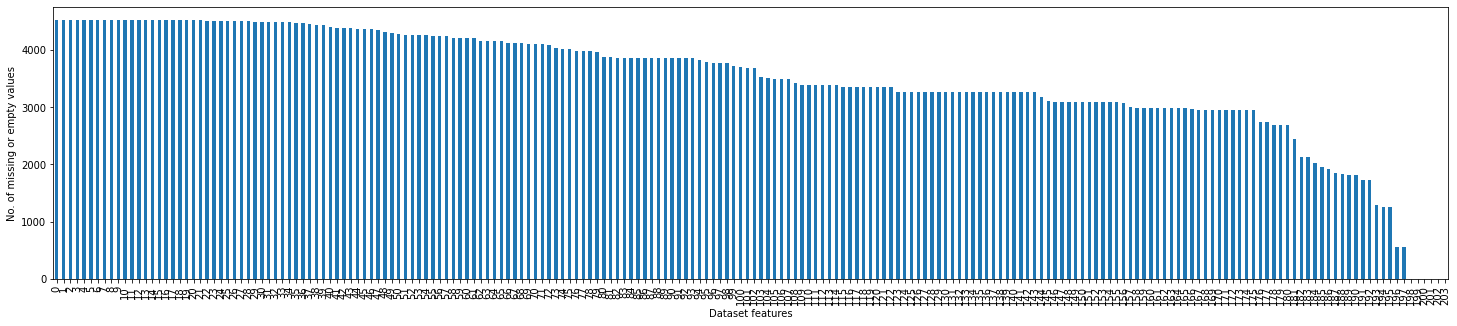

In [14]:
# Kiểm tra dữ liệu nhiễu
noisyData = ShowNullValues(survey)

<h2> Kinh nghiệm trước đây về sức khỏe tâm thần</h2>

In [15]:
describethe = survey.loc[:, survey.columns.str.contains('describe the')]
describethe.fillna('', inplace=True)
survey['Describe Past Experience'] = describethe.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.drop(describethe, axis=1, inplace=True)
showPastExperience = survey['Describe Past Experience']
print(showPastExperience)

0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
                              ...                        
4524    During pair programming I could notice some co...
4525                                                     
4526                                                     
4527                                                     
4528    They put more pressure to them and ultimately ...
Name: Describe Past Experience, Length: 4529, dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
# mức độ ưu tiên ẩn danh
anon = survey.loc[:, survey.columns.str.contains('anonymous')]
anon.fillna('', inplace=True)
survey['Prefer Anonymity'] = anon.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Prefer Anonymity'].str.contains('yes|1.0|1|Yes|True|true', regex=True, na=False), 'Prefer Anonymity'] = 1
survey.loc[survey['Prefer Anonymity'].str.contains('no|0.0|0|No|False|false' , regex=True, na=False), 'Prefer Anonymity'] = 0
survey.drop(anon, axis=1, inplace=True)
showPreferAnonymity = survey['Prefer Anonymity']
print(showPreferAnonymity.unique())

['  ' 0 1]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [17]:
# xếp hạng phản ứng với các vấn đề
react = survey.loc[:, survey.columns.str.contains('react')]
react.fillna('', inplace=True)
survey['Rate Reaction to Problems'] = react.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Rate Reaction to Problems'].str.contains('0.0|1.0|2.0|3.0|4.0|5.0', regex=True), 'Rate Reaction to Problems'] = 'Below Average'
survey.loc[survey['Rate Reaction to Problems'].str.contains('6.0|7.0|8.0|9.0|10.0', regex=True), 'Rate Reaction to Problems'] = 'Above Average'
survey.drop(react, axis=1, inplace=True)
showReaction = survey['Rate Reaction to Problems']
print(showReaction.unique())

['  ' 'Above Average' 'Below Average']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
# Hậu quả tiêu cực để lại
neg = survey.loc[:, survey.columns.str.contains('negative|badly', regex=True)]
neg.fillna(' ', inplace=True)
survey['Negative Consequences'] = neg.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Negative Consequences'].str.contains('yes|1.0|1|Yes' , regex=True), 'Negative Consequences'] = 'Yes'
survey.loc[survey['Negative Consequences'].str.contains('maybe|Maybe|1' , regex=True), 'Negative Consequences'] = 'Maybe'
survey.loc[survey['Negative Consequences'].str.contains('no|No|0' , regex=True), 'Negative Consequences'] = 'No'
survey.loc[survey['Negative Consequences'].str.contains('self-employed' , regex=True), 'Negative Consequences'] = 'Self-Employed'
survey.drop(neg, axis=1, inplace=True)
showNegativeConsequnces = survey['Negative Consequences']
print(showNegativeConsequnces.unique())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


['No' 'Maybe' 'Yes' 'Self-Employed' '              ']


<h2>Nơi sinh sống của người được khảo sát</h2>

In [19]:
work = survey.loc[:, survey.columns.str.contains('work in', regex=True)]
survey.drop(work, axis=1, inplace=True)
state = survey.loc[:, survey.columns.str.contains('country', regex=True)]
state.fillna('', inplace=True)
survey['Location'] = state.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Location'].str.contains('[A-Z][A-Z]|United States' , regex=True), 'Location'] = 'USA'
showLocation = survey['Location']
survey.drop(state, axis=1, inplace=True)
print(showLocation.unique())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


['USA' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines' 'Lithuania' 'Venezuela'
 'Argentina' 'Vietnam' 'Slovakia' 'Bangladesh' 'Algeria' 'Pakistan'
 'Afghanistan' 'Other' 'Brunei' 'Iran' 'Ecuador' 'Chile' 'Guatemala'
 'Taiwan' 'Serbia' 'Estonia' 'United KingdomUnited Kingdom'
 'NetherlandsNetherlands' 'CanadaCanada' 'TurkeyTurkey' 'BelgiumBelgium'
 'CroatiaCroatia' 'United KingdomOther' 'GhanaGhana' 'NorwayNorway'
 'PortugalPortugal' 'SwitzerlandSwitzerland' 'PakistanPakistan'
 'PolandPoland' 'SpainSpain' 'IndiaIndia' '

<h2>Khả năng tiếp cận trợ giúp sức khỏe tâm thần</h2>

In [20]:
# truy cập thông tin 
resources = survey.loc[:, survey.columns.str.contains('resources', regex=True)]
resources.fillna('', inplace=True)
survey['Access to information'] = resources.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Access to information'].str.contains('yes|Yes' , regex=True, na=False), 'Access to information'] = 1
survey.loc[survey['Access to information'].str.contains('no|No' , regex=True, na=False), 'Access to information'] = 0
survey.drop(resources, axis=1, inplace=True)
showAccessToInformation = survey['Access to information']
print(showAccessToInformation.unique())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


[1 0]


                                                    Total missing     Percent
post-traumatic stress disorder                               4529  100.000000
addictive disorder                                           4529  100.000000
personality disorder (borderline, antisocial, p...           4529  100.000000
dissociative disorder                                        4529  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4529  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4529  100.000000
stress response syndromes                                    4529  100.000000
attention deficit hyperactivity disorder                     4529  100.000000
substance use disorder                                       4529  100.000000
anxiety disorder (generalized, social, phobia, ...           4529  100.000000
other                                                        4529  100.000000
obsessive-compulsive disorder                                452

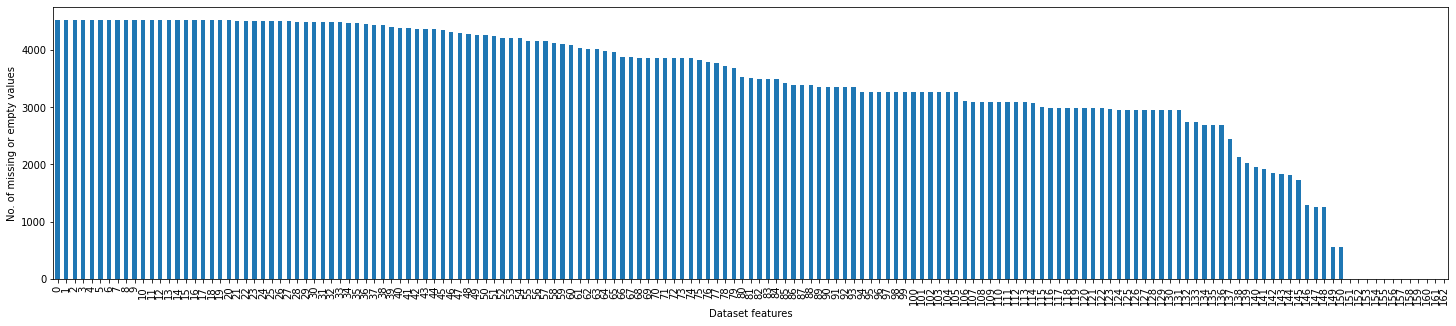

In [21]:
noisyData = ShowNullValues(survey)

<h3>Tiền sử chuẩn đoán bệnh tâm lý, mức độ thoải mái chia sẻ với đồng nghiệp và quản lý</h3>

In [22]:
insurance = survey.loc[:, survey.columns.str.contains('insurance', regex=True)]
insurance.fillna('', inplace=True)
survey['Insurance'] = insurance.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Insurance'].str.contains('1.0|1|True|true' , regex=True, na=False), 'Insurance'] = 1
survey.loc[survey['Insurance'].str.contains('0.0|0|False|false' , regex=True, na=False), 'Insurance'] = 0
survey.drop(insurance, axis=1, inplace=True)
showInsurance = survey['Insurance']
print(showInsurance.unique())

[' ' 1 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [23]:
diagnosis = survey.loc[:, survey.columns.str.contains('diagnosed|Diagnosed|diagnose|Diagnose', regex=True)]
diagnosis.fillna(' ', inplace=True)
survey['Diagnosis'] = diagnosis.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Diagnosis'].str.contains('yes|Yes|True|true' , regex=True), 'Diagnosis'] = 'Yes'
survey.loc[survey['Diagnosis'].str.contains('no|No|False|false' , regex=True), 'Diagnosis'] = 'No'
survey.loc[survey['Diagnosis'].str.contains('sometimes|Sometimes' , regex=True), 'Diagnosis'] = 'Sometimes'
survey.drop(diagnosis, axis=1, inplace=True)
showDiagnosis = survey['Diagnosis']
print(showDiagnosis.unique())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


['            ' 'Yes' 'No' 'Sometimes']


In [24]:
# thảo luận về sức khỏe tâm thần
discuss = survey.loc[:, survey.columns.str.contains('discuss|Discuss', regex=True)]
discuss.fillna('', inplace=True)
survey['Discuss Mental Health Problems'] = discuss.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Discuss Mental Health Problems'].str.contains('some|Some' , regex=True), 'Discuss Mental Health Problems'] = 'Maybe'
survey.loc[survey['Discuss Mental Health Problems'].str.contains('yes|Yes' , regex=True), 'Discuss Mental Health Problems'] = 'Yes'
survey.loc[survey['Discuss Mental Health Problems'].str.contains('no|No' , regex=True), 'Discuss Mental Health Problems'] = 'No'
survey.drop(discuss, axis=1, inplace=True)
showDiscussMentalHealthProblems = survey['Discuss Mental Health Problems']
print(showDiscussMentalHealthProblems.unique())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


['Maybe' 'No' 'Yes' '']


<h3>Trợ giúp liên quan đến sức khỏe tâm thần</h3>

In [25]:
response = survey.loc[:, survey.columns.str.contains('handled|provided|serious', regex=True)]
response.fillna(' ', inplace=True)
survey['Responsible Employer'] = response.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Responsible Employer'].str.contains('some|Some' , regex=True), 'Responsible Employer'] = 'Maybe'
survey.loc[survey['Responsible Employer'].str.contains('yes|Yes' , regex=True), 'Responsible Employer'] = 'Yes'
survey.loc[survey['Responsible Employer'].str.contains('no|No' , regex=True), 'Responsible Employer'] = 'No'
survey.loc[survey['Responsible Employer'].str.contains('self-employed' , regex=True), 'Responsible Employer'] = 'Self-Employed'
survey.drop(response, axis=1, inplace=True)
showResposibleEmployer = survey['Responsible Employer']
print(showResposibleEmployer.unique())

['Yes' 'No' 'Maybe' '          ' 'Self-Employed']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


                                                    Total missing     Percent
mood disorder (depression, bipolar disorder, etc)            4529  100.000000
attention deficit hyperactivity disorder                     4529  100.000000
obsessive-compulsive disorder                                4529  100.000000
other                                                        4529  100.000000
personality disorder (borderline, antisocial, p...           4529  100.000000
eating disorder (anorexia, bulimia, etc)                     4529  100.000000
post-traumatic stress disorder                               4529  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4529  100.000000
stress response syndromes                                    4529  100.000000
substance use disorder                                       4529  100.000000
dissociative disorder                                        4529  100.000000
psychotic disorder (schizophrenia, schizoaffect...           452

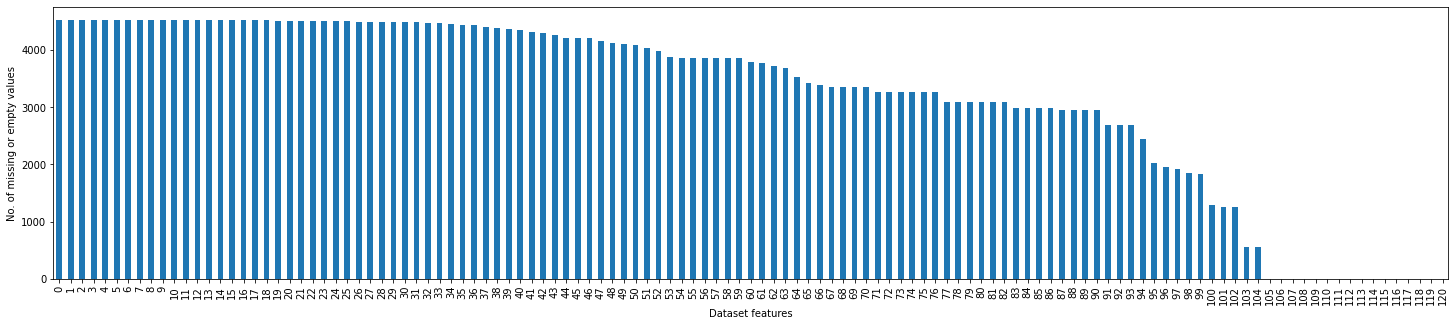

In [26]:
noisyData = ShowNullValues(survey)

<h3> Tiền sử bệnh, lĩnh vực công tác </3>

In [27]:
Disorder = survey.loc[:, survey.columns.str.contains('Disorder|disorder|syndrome|other', regex=True)]
Disorder.fillna('', inplace=True)
DisorderNotes = Disorder.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey['Disorder Notes'] = DisorderNotes
survey['Disorder'] = DisorderNotes
disorderTerms = 'disorder|Disorder|negative|Negative|syndrome|Syndrome|bipolar|Bipolar|depression|Depression|autism|PTSD|Yes|yes'
survey.loc[survey['Disorder'].str.contains(disorderTerms , regex=True), 'Disorder'] = 1
survey.loc[survey['Disorder']!=1, 'Disorder'] = 0
survey.drop(Disorder, axis=1, inplace=True)
showDisorder = survey[['Disorder', 'Disorder Notes']]
print(survey['Disorder'].unique())

[0 1]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [28]:
techEmployer = survey.loc[:, survey.columns.str.contains('tech company|tech/IT', regex=True)]
techEmployer.fillna(' ', inplace=True)
survey['Primarily a Tech Employer'] = techEmployer.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Primarily a Tech Employer'].str.contains('yes|Yes|1|1.0|True|true' , regex=True, na=False), 'Primarily a Tech Employer'] = 1
survey.loc[survey['Primarily a Tech Employer'].str.contains('no|No|0|0.0|False|false' , regex=True, na=False), 'Primarily a Tech Employer'] = 0
survey.drop(techEmployer, axis=1, inplace=True)
showTechEmployer = survey['Primarily a Tech Employer']
print(showTechEmployer.unique())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


[1 0 '  ']


                                                    Total missing    Percent
how has it affected your career?                             4447  98.189446
any additional notes or comments                             4365  96.378892
has being identified as a person with a mental ...           4307  95.098256
what us state or territory do you *live* in?                 4211  92.978582
what us state or territory do you *work* in?                 4209  92.934423
if maybe, what condition(s) do you believe you ...           4207  92.890263
if yes, what percentage of your work time (time...           4131  91.212188
if there is anything else you would like to tel...           4034  89.070435
do you believe your productivity is ever affect...           3983  87.944359
does your employer provide mental health benefi...           3886  85.802605
would you bring up your *mental* health with a ...           3866  85.361007
*do you have previous employers?*                            3866  85.361007

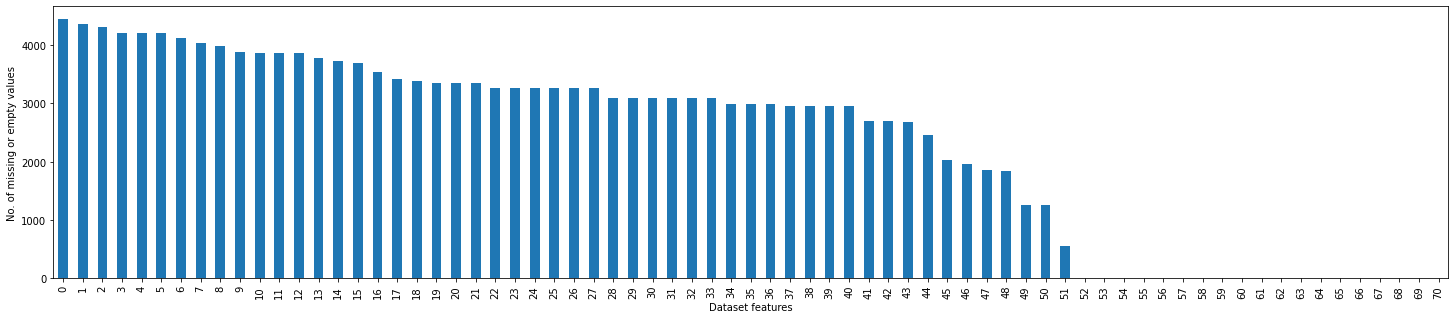

In [29]:
noisyData = ShowNullValues(survey)

<h3> Loại bỏ cột trống và trùng lặp </h3>

In [30]:
survey = survey.loc[:, ~survey.columns.duplicated()]
survey.replace('', np.nan, inplace=True)   


emptyColumns = survey.isnull().sum() 
for column in emptyColumns.index:
      if emptyColumns[column]>1000:
          survey.drop(column, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h3> Lưu lại ở file csv mới </h3>

In [31]:
for feature in survey:
    try: 
        survey[feature] = pd.to_numeric(survey[feature], errors='coerce').astype(int)
        print('int cast\t\t', feature)
    except:
       try:
           survey[feature] = survey[feature].astype(str)
           survey.loc[survey[feature].str.contains('^\s+$|nan' , regex=True), feature] = np.nan
           print('object/float cast\t', feature)
       except:
           continue
                 
survey.to_csv('/content/drive/MyDrive/MentalHealth/cleanedDatasets/OSMIcleaned.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

object/float cast	 Family History of Mental Illness
object/float cast	 Company Size
int cast		 year
int cast		 Age
object/float cast	 Age-Group
object/float cast	 Gender
int cast		 Sought Treatment
object/float cast	 Describe Past Experience
object/float cast	 Prefer Anonymity
object/float cast	 Rate Reaction to Problems
object/float cast	 Negative Consequences
object/float cast	 Location
int cast		 Access to information
object/float cast	 Insurance
object/float cast	 Diagnosis
object/float cast	 Discuss Mental Health Problems
object/float cast	 Responsible Employer
object/float cast	 Disorder Notes
int cast		 Disorder
object/float cast	 Primarily a Tech Employer


                                  Total missing    Percent
Insurance                                  3983  87.944359
Describe Past Experience                   3411  75.314639
Prefer Anonymity                           2695  59.505410
Rate Reaction to Problems                  2695  59.505410
Diagnosis                                  2187  48.288805
Disorder Notes                             1260  27.820711
Company Size                                546  12.055641
Primarily a Tech Employer                   321   7.087657
Responsible Employer                         38   0.839037
Discuss Mental Health Problems               34   0.750718
Location                                      2   0.044160
Negative Consequences                         2   0.044160
Access to information                         0   0.000000
Sought Treatment                              0   0.000000
Gender                                        0   0.000000
Age-Group                                     0   0.0000

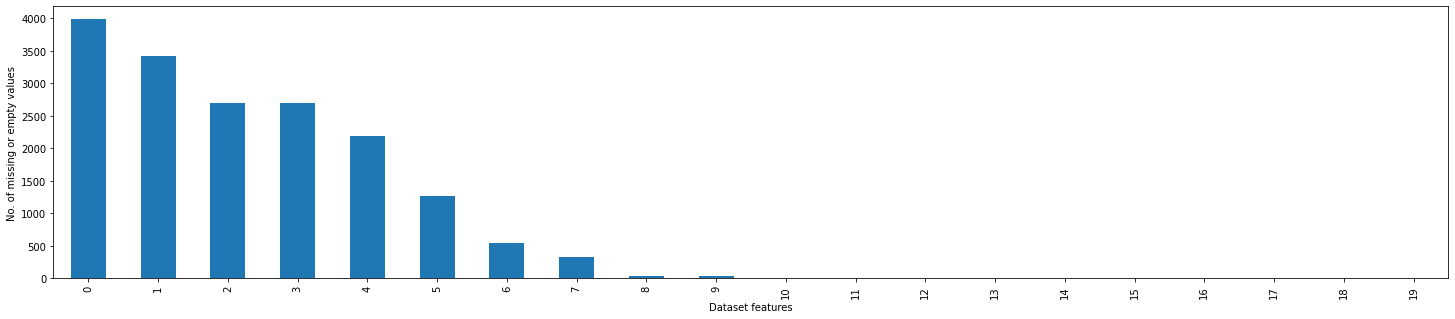

In [32]:
noisyData = ShowNullValues(survey)

In [33]:
print(survey.shape)

(4529, 20)
